# Tutorial for gwaslab

- In this tutorial, we will perform a common pipeline for sumstats QC, standardization and harmonization. 
- We will also show examples of visualization.
- Using a jupyter notebook, we first download sample data.

## Download sample data

The data we will use as an example: sumstats of type 2 diabetes from BBJ 

In [1]:
!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

--2022-10-21 15:41:14--  http://jenger.riken.jp/14/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274187574 (261M) [text/plain]
Saving to: ‘t2d_bbj.txt.gz’

t2d_bbj.txt.gz      100%[===================>] 261.49M  38.0MB/s    in 7.3s    

2022-10-21 15:41:22 (36.0 MB/s) - ‘t2d_bbj.txt.gz’ saved [274187574/274187574]



## Import gwaslab package

If you download it from pip, simply run:

In [1]:
import gwaslab as gl

Or if you want to use the latest version from github (beta version) you can clone the repo and import like:

In [1]:
import sys
sys.path.insert(0,"/home/yunye/gwaslab/gwaslab/src")
import gwaslab as gl

## Loading data into gwaslab Sumstats

Let's import this raw sumstats into the gwaslab Sumstats Object by specifying the necessary columns.

Note: you can either specify eaf (effect allele frequency) or neaf (non-effect allele frequency), if neaf is specified, it will be converted to eaf when loading sumstats.

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N")

Sat Nov  5 18:45:52 2022 Start to initiate from file :t2d_bbj.txt.gz
Sat Nov  5 18:46:10 2022  -Reading columns          : REF,N,CHR,P,BETA,Dir,SE,POS,Frq,SNP,ALT
Sat Nov  5 18:46:10 2022  -Renaming columns to      : NEA,N,CHR,P,BETA,DIRECTION,SE,POS,EAF,SNPID,EA
Sat Nov  5 18:46:10 2022  -Current Dataframe shape : 12557761  x  11
Sat Nov  5 18:46:11 2022  -Initiating a status column: STATUS ...
Sat Nov  5 18:46:16 2022  -NEAF is specified...
Sat Nov  5 18:46:16 2022  -Checking if 0<= NEAF <=1 ...
Sat Nov  5 18:46:17 2022  -Converted NEAF to EAF.
Sat Nov  5 18:46:17 2022  -Removed 0 variants with bad NEAF.
Sat Nov  5 18:46:18 2022 Start to reorder the columns...
Sat Nov  5 18:46:18 2022  -Current Dataframe shape : 12557761  x  12
Sat Nov  5 18:46:18 2022  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
Sat Nov  5 18:46:18 2022 Finished sorting columns successfully!
Sat Nov  5 18:46:18 2022 Finished loading data successfully!


Sumstats are stored in Sumstats.data as apandas.DataFrame, you can check the data by: 

In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9999999
12557757,X:154875192_GTACTC_G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9999999
12557758,X:154879115_A_G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9999999
12557759,X:154880669_T_A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9999999


For details on gwaslab Sumstats Object, see: https://cloufield.github.io/gwaslab/SumstatsObject/

## Create Manhattan and Q-Q plot

Maybe the first thing you want to check is the manhattan and qq plots. gwaslab will do a minimum QC for sumstats when plotting.

For details on Manhattan and Q-Q plot, see: https://cloufield.github.io/gwaslab/Visualization/

Sat Nov  5 18:27:27 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Nov  5 18:27:27 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Nov  5 18:27:27 2022  -Raw input contains 12557761 variants...
Sat Nov  5 18:27:27 2022  -Plot layout mode is : mqq
Sat Nov  5 18:27:35 2022 Finished loading specified columns from the sumstats.
Sat Nov  5 18:27:35 2022 Start conversion and sanity check:
Sat Nov  5 18:27:36 2022  -Removed 328791 variants with nan in CHR or POS column ...
Sat Nov  5 18:27:37 2022  -Removed 0 variants with nan in P column ...
Sat Nov  5 18:27:37 2022  -P values are being converted to -log10(P)...
Sat Nov  5 18:27:37 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Nov  5 18:27:39 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Sat Nov  5 18:27:41 2022  -Maximum -log10(P) values is 167.58838029403677 .
Sat Nov  5 18:27:41 2022 Finished data conversion and sanity check

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f2377c8bfd0>)

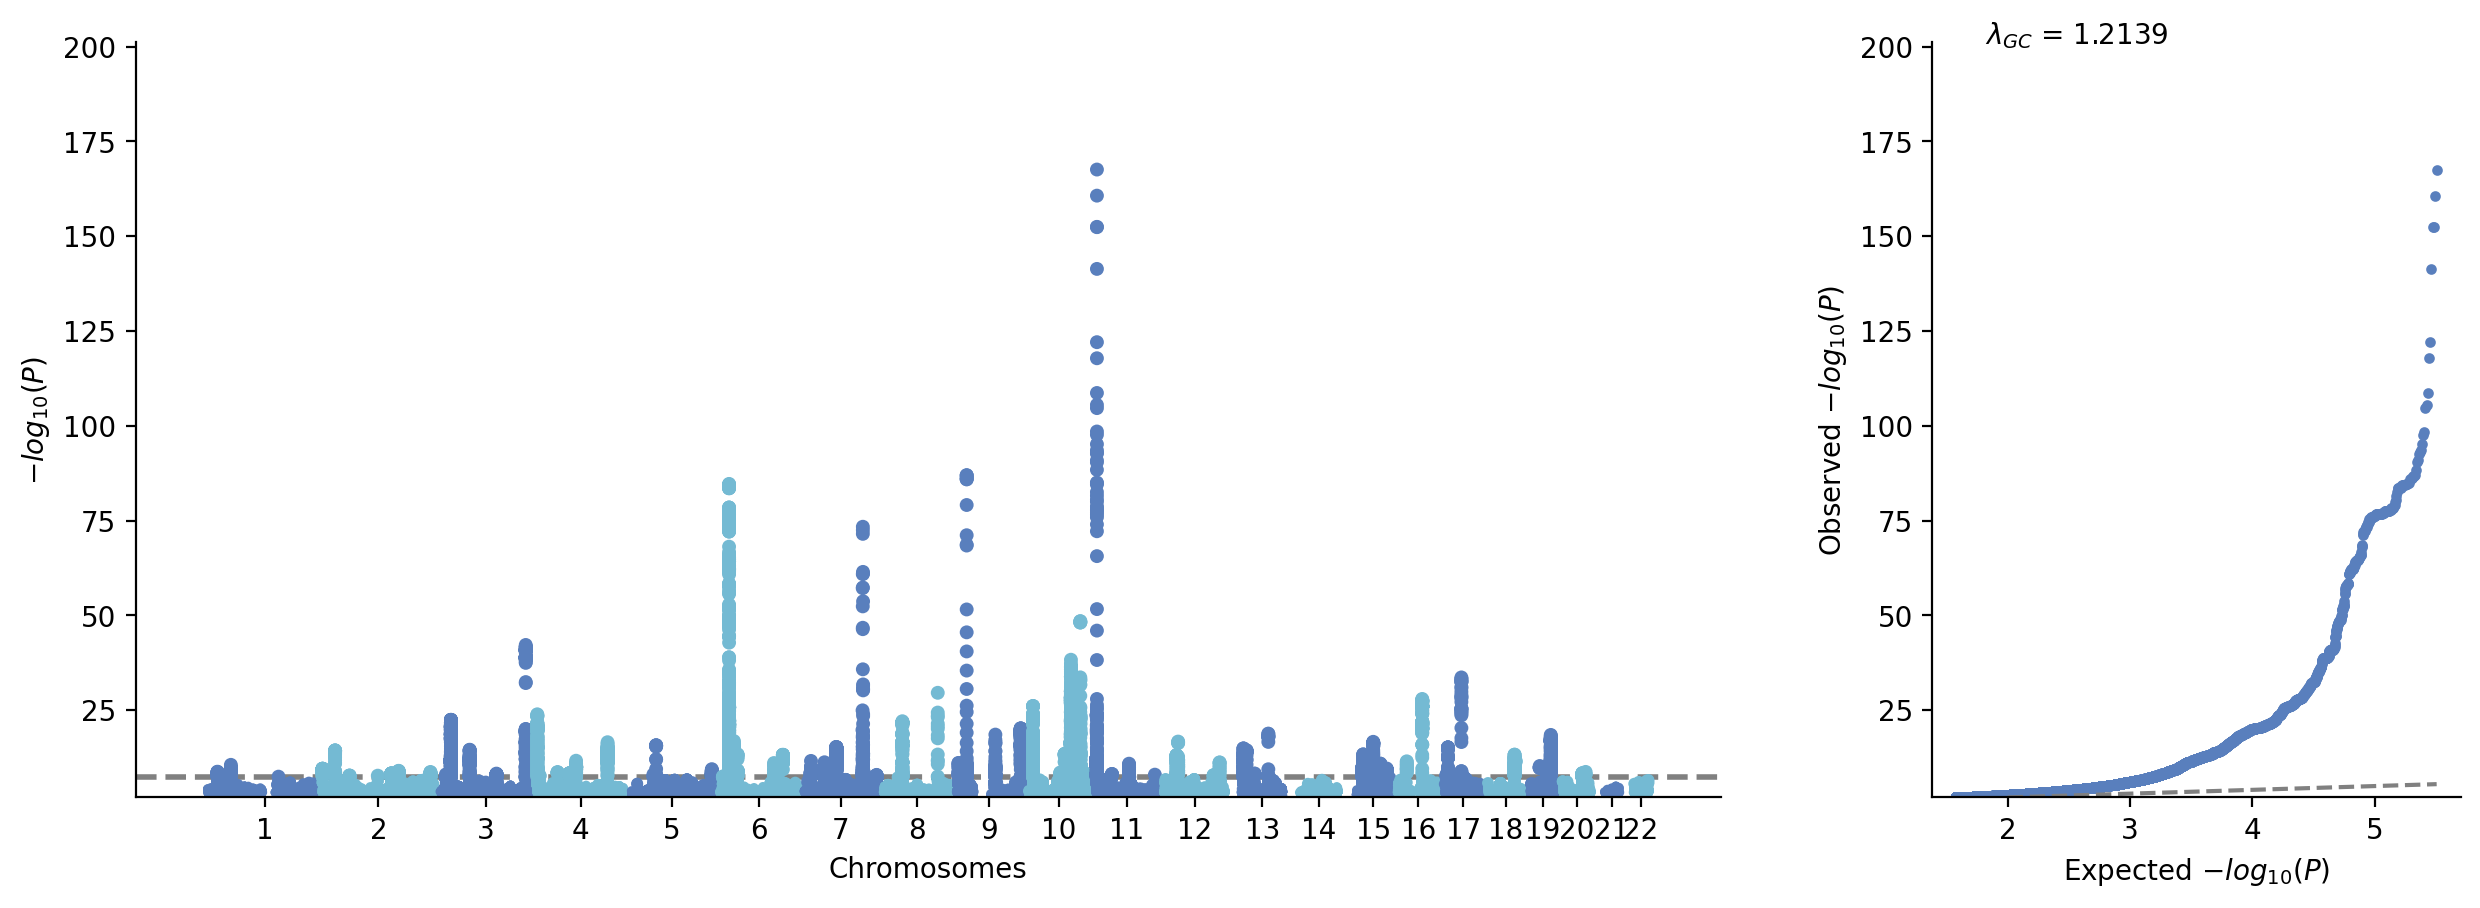

In [4]:
# skip : skip variants with MLOG10P<2 for faster plotting speed
mysumstats.plot_mqq(skip=2)

## Standardization & QC : basic_check()

It is needed to check SNP ID, rsID, chromosome, basepair position, alleles and statistics first before any manipulations (sometimes you need do this before plotting if the sumstats is in a really messy format):

In [5]:
#check SNPID,rsID,CHR,POS,EA, NEA and statistics
mysumstats.basic_check()

Sat Nov  5 18:27:45 2022 Start to check IDs...
Sat Nov  5 18:27:45 2022  -Current Dataframe shape : 12557761  x  12
Sat Nov  5 18:27:45 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Sat Nov  5 18:27:57 2022 Finished checking IDs successfully!
Sat Nov  5 18:27:57 2022 Start to fix chromosome notation...
Sat Nov  5 18:27:57 2022  -Current Dataframe shape : 12557761  x  12
Sat Nov  5 18:28:28 2022  -Vairants with fixable chromosome notations: 328791
Sat Nov  5 18:28:30 2022  -Converting to string datatype and UPPERCASE...
Sat Nov  5 18:28:30 2022  -Stripping chr prefix if exists : CHR_-.0...
Sat Nov  5 18:28:32 2022  -Identified  328791  variants on sex chromosomes...
Sat Nov  5 18:28:32 2022  -Standardizing sex chromosome notations: X Y MT  to 23,24,25...
Sat Nov  5 18:28:46 2022  -No unrecognized chromosome notations...
Sat Nov  5 18:28:52 2022 Finished fixing chromosome notation successfully!
Sat Nov  5 18:28:52 2022 Start to fix basepair positions...
Sat Nov  5 1

In [6]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9960099
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9960099
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9960099
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9960399
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,23,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9960099
12557757,X:154875192_GTACTC_G,23,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9960399
12557758,X:154879115_A_G,23,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9960099
12557759,X:154880669_T_A,23,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9960099


By checking the log, the sumstats look good. But we found several variants that were not normalizaed and gwaslab fixed this.

.basic_check() is a wrapper of all the following basic functions, you can use these separately.

- mysumstats.fix_ID()
- mysumstats.fix_chr()
- mysumstats.fix_pos()
- mysumstats.fix_allele()
- mysumstats.check_sanity()
- mysumstats.normalize_allele()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

## Extract lead variants : get_lead()

Let's extract the lead variants in each significant loci to check our data.

The significant loci are detected based on a sliding window (default window size: `windowsizekb=500` kb)

By specifying `anno=True` , gwaslab will also annotate the lead variant with its nearest gene names and distance.

Note: gwaslab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed.

In [7]:
mysumstats.get_lead(anno=True)

Sat Nov  5 18:30:22 2022 Start to extract lead variants...
Sat Nov  5 18:30:22 2022  -Processing 12557761 variants...
Sat Nov  5 18:30:22 2022  -Significance threshold : 5e-08
Sat Nov  5 18:30:22 2022  -Sliding window size: 500  kb
Sat Nov  5 18:30:25 2022  -Found 9461 significant variants in total...
Sat Nov  5 18:30:25 2022  -Identified 89 lead variants!
Sat Nov  5 18:30:25 2022 Start to annotate variants with nearest gene name(s)...
Sat Nov  5 18:30:25 2022  -Assigning Gene name using Ensembl Release hg19
Sat Nov  5 18:30:29 2022 Finished annotating variants with nearest gene name(s) successfully!
Sat Nov  5 18:30:29 2022 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,LOCATION,GENE
96739,1:22068326_A_G,1,22068326,G,A,0.7550,0.0621,0.0103,1.629000e-09,191764,++++,9960099,0,USP48
213860,1:51103268_T_C,1,51103268,C,T,0.7953,-0.0802,0.0120,2.519000e-11,191764,----,9960099,0,FAF1
534095,1:154309595_TA_T,1,154309595,TA,T,0.0947,-0.0915,0.0166,3.289000e-08,191764,----,9960399,0,ATP8B2
969974,2:640986_CACAT_C,2,640986,C,CACAT,0.9006,-0.0946,0.0150,2.665000e-10,191764,----,9960399,26349,TMEM18
1091807,2:27734972_G_A,2,27734972,G,A,0.5605,0.0691,0.0088,3.897000e-15,191764,++++,9960099,0,GCKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272930,X:21569920_A_G,23,21569920,G,A,0.3190,0.0423,0.0076,2.616000e-08,191764,++++,9960099,0,CNKSR2
12341406,X:48724648_CAA_C,23,48724648,C,CAA,0.6260,-0.0602,0.0103,4.576000e-09,191764,----,9960399,26082,TIMM17B
12350767,X:57170781_A_AT,23,57170781,AT,A,0.3003,-0.0447,0.0076,4.583000e-09,191764,----,9960399,-6723,SPIN2A
12469290,X:117915163_T_TA,23,117915163,TA,T,0.5560,0.0548,0.0071,9.818000e-15,191764,++++,9960399,0,IL13RA1


For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

## Use the SNPID to create some highly customized mqq plot

Gwaslab can create more complicated manhattan plot.

plot and save as my_first_mqq_plot.png with {"dpi":400,"facecolor":"white"}

Sat Nov  5 18:30:29 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Nov  5 18:30:29 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Nov  5 18:30:29 2022  -Raw input contains 12557761 variants...
Sat Nov  5 18:30:29 2022  -Plot layout mode is : mqq
Sat Nov  5 18:30:29 2022  -Variants to annotate : 9:22132729_A_G,6:20688121_T_A,9:22132729_A_G,15:62394264_G_C
Sat Nov  5 18:30:29 2022  -Loci to highlight : 7:127253550_C_T,19:46166604_C_T
Sat Nov  5 18:30:29 2022  -Highlight_window is set to:  1000  kb
Sat Nov  5 18:30:29 2022  -Variants to pinpoint : 9:22132729_A_G,5:176513896_C_A
Sat Nov  5 18:30:36 2022 Finished loading specified columns from the sumstats.
Sat Nov  5 18:30:36 2022 Start conversion and sanity check:
Sat Nov  5 18:30:37 2022  -Removed 0 variants with nan in CHR or POS column ...
Sat Nov  5 18:30:38 2022  -Removed 0 variants with nan in EAF column ...
Sat Nov  5 18:30:39 2022  -Removed 0 variants with nan in P column ...
Sat Nov  5 

(<Figure size 4500x1500 with 2 Axes>, <gwaslab.Log.Log at 0x7f2377c8bfd0>)

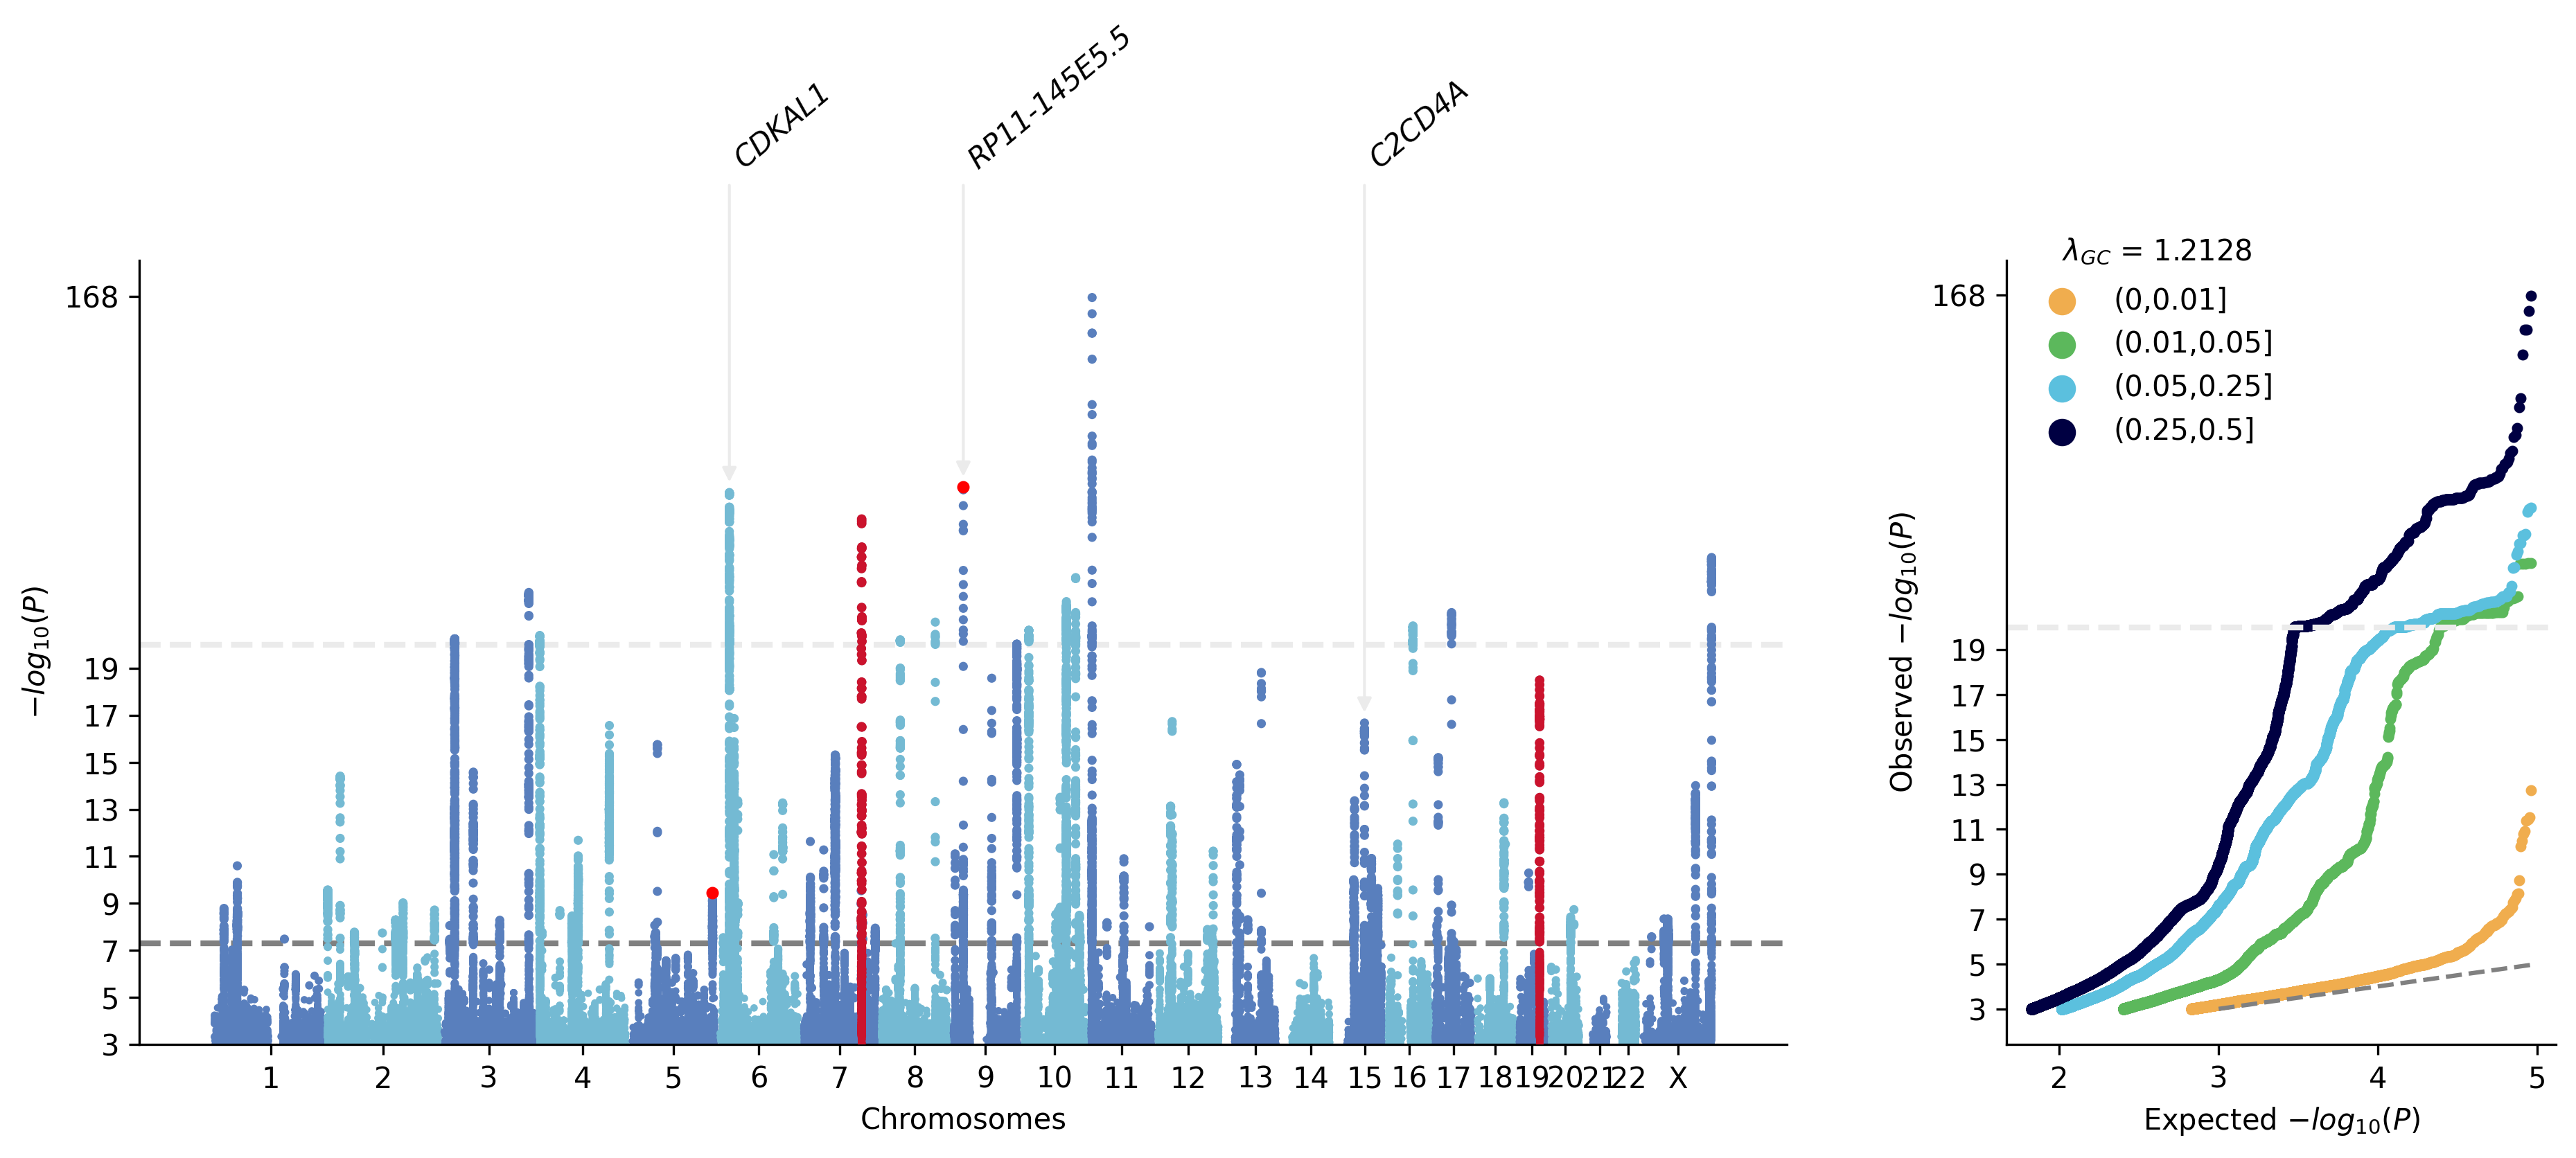

In [8]:
mysumstats.plot_mqq(mode="mqq",
                  cut=20,skip=3,
                  anno="GENENAME",
                  anno_set=["9:22132729_A_G","6:20688121_T_A","9:22132729_A_G","15:62394264_G_C"] ,
                  pinpoint=["9:22132729_A_G","5:176513896_C_A"], 
                  highlight=["7:127253550_C_T","19:46166604_C_T"],
                  highlight_windowkb =1000,
                  stratified=True,
                  marker_size=(5,10),
                  figargs={"figsize":(15,5),"dpi":300},
                  save="my_first_mqq_plot.png", 
                  saveargs={"dpi":400,"facecolor":"white"})

For details, see: https://cloufield.github.io/gwaslab/Visualization/

## Quick regional plot without LD-information

Gwaslab can plot regional plot with or with out LD reference files.

For details see: https://cloufield.github.io/gwaslab/RegionalPlot/

Sat Nov  5 18:30:50 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Nov  5 18:30:50 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Nov  5 18:30:50 2022  -Raw input contains 12557761 variants...
Sat Nov  5 18:30:50 2022  -Plot layout mode is : r
Sat Nov  5 18:30:50 2022  -Region to plot : chr7:156538803-157538803.
Sat Nov  5 18:30:51 2022  -Extract SNPs in region : chr7:156538803-157538803...
Sat Nov  5 18:31:18 2022  -Extract SNPs in specified regions: 5831
Sat Nov  5 18:31:18 2022 Finished loading specified columns from the sumstats.
Sat Nov  5 18:31:18 2022 Start conversion and sanity check:
Sat Nov  5 18:31:18 2022  -Removed 0 variants with nan in CHR or POS column ...
Sat Nov  5 18:31:18 2022  -Removed 0 variants with nan in P column ...
Sat Nov  5 18:31:18 2022  -P values are being converted to -log10(P)...
Sat Nov  5 18:31:18 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Nov  5 18:3

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.Log.Log at 0x7f2377c8bfd0>)

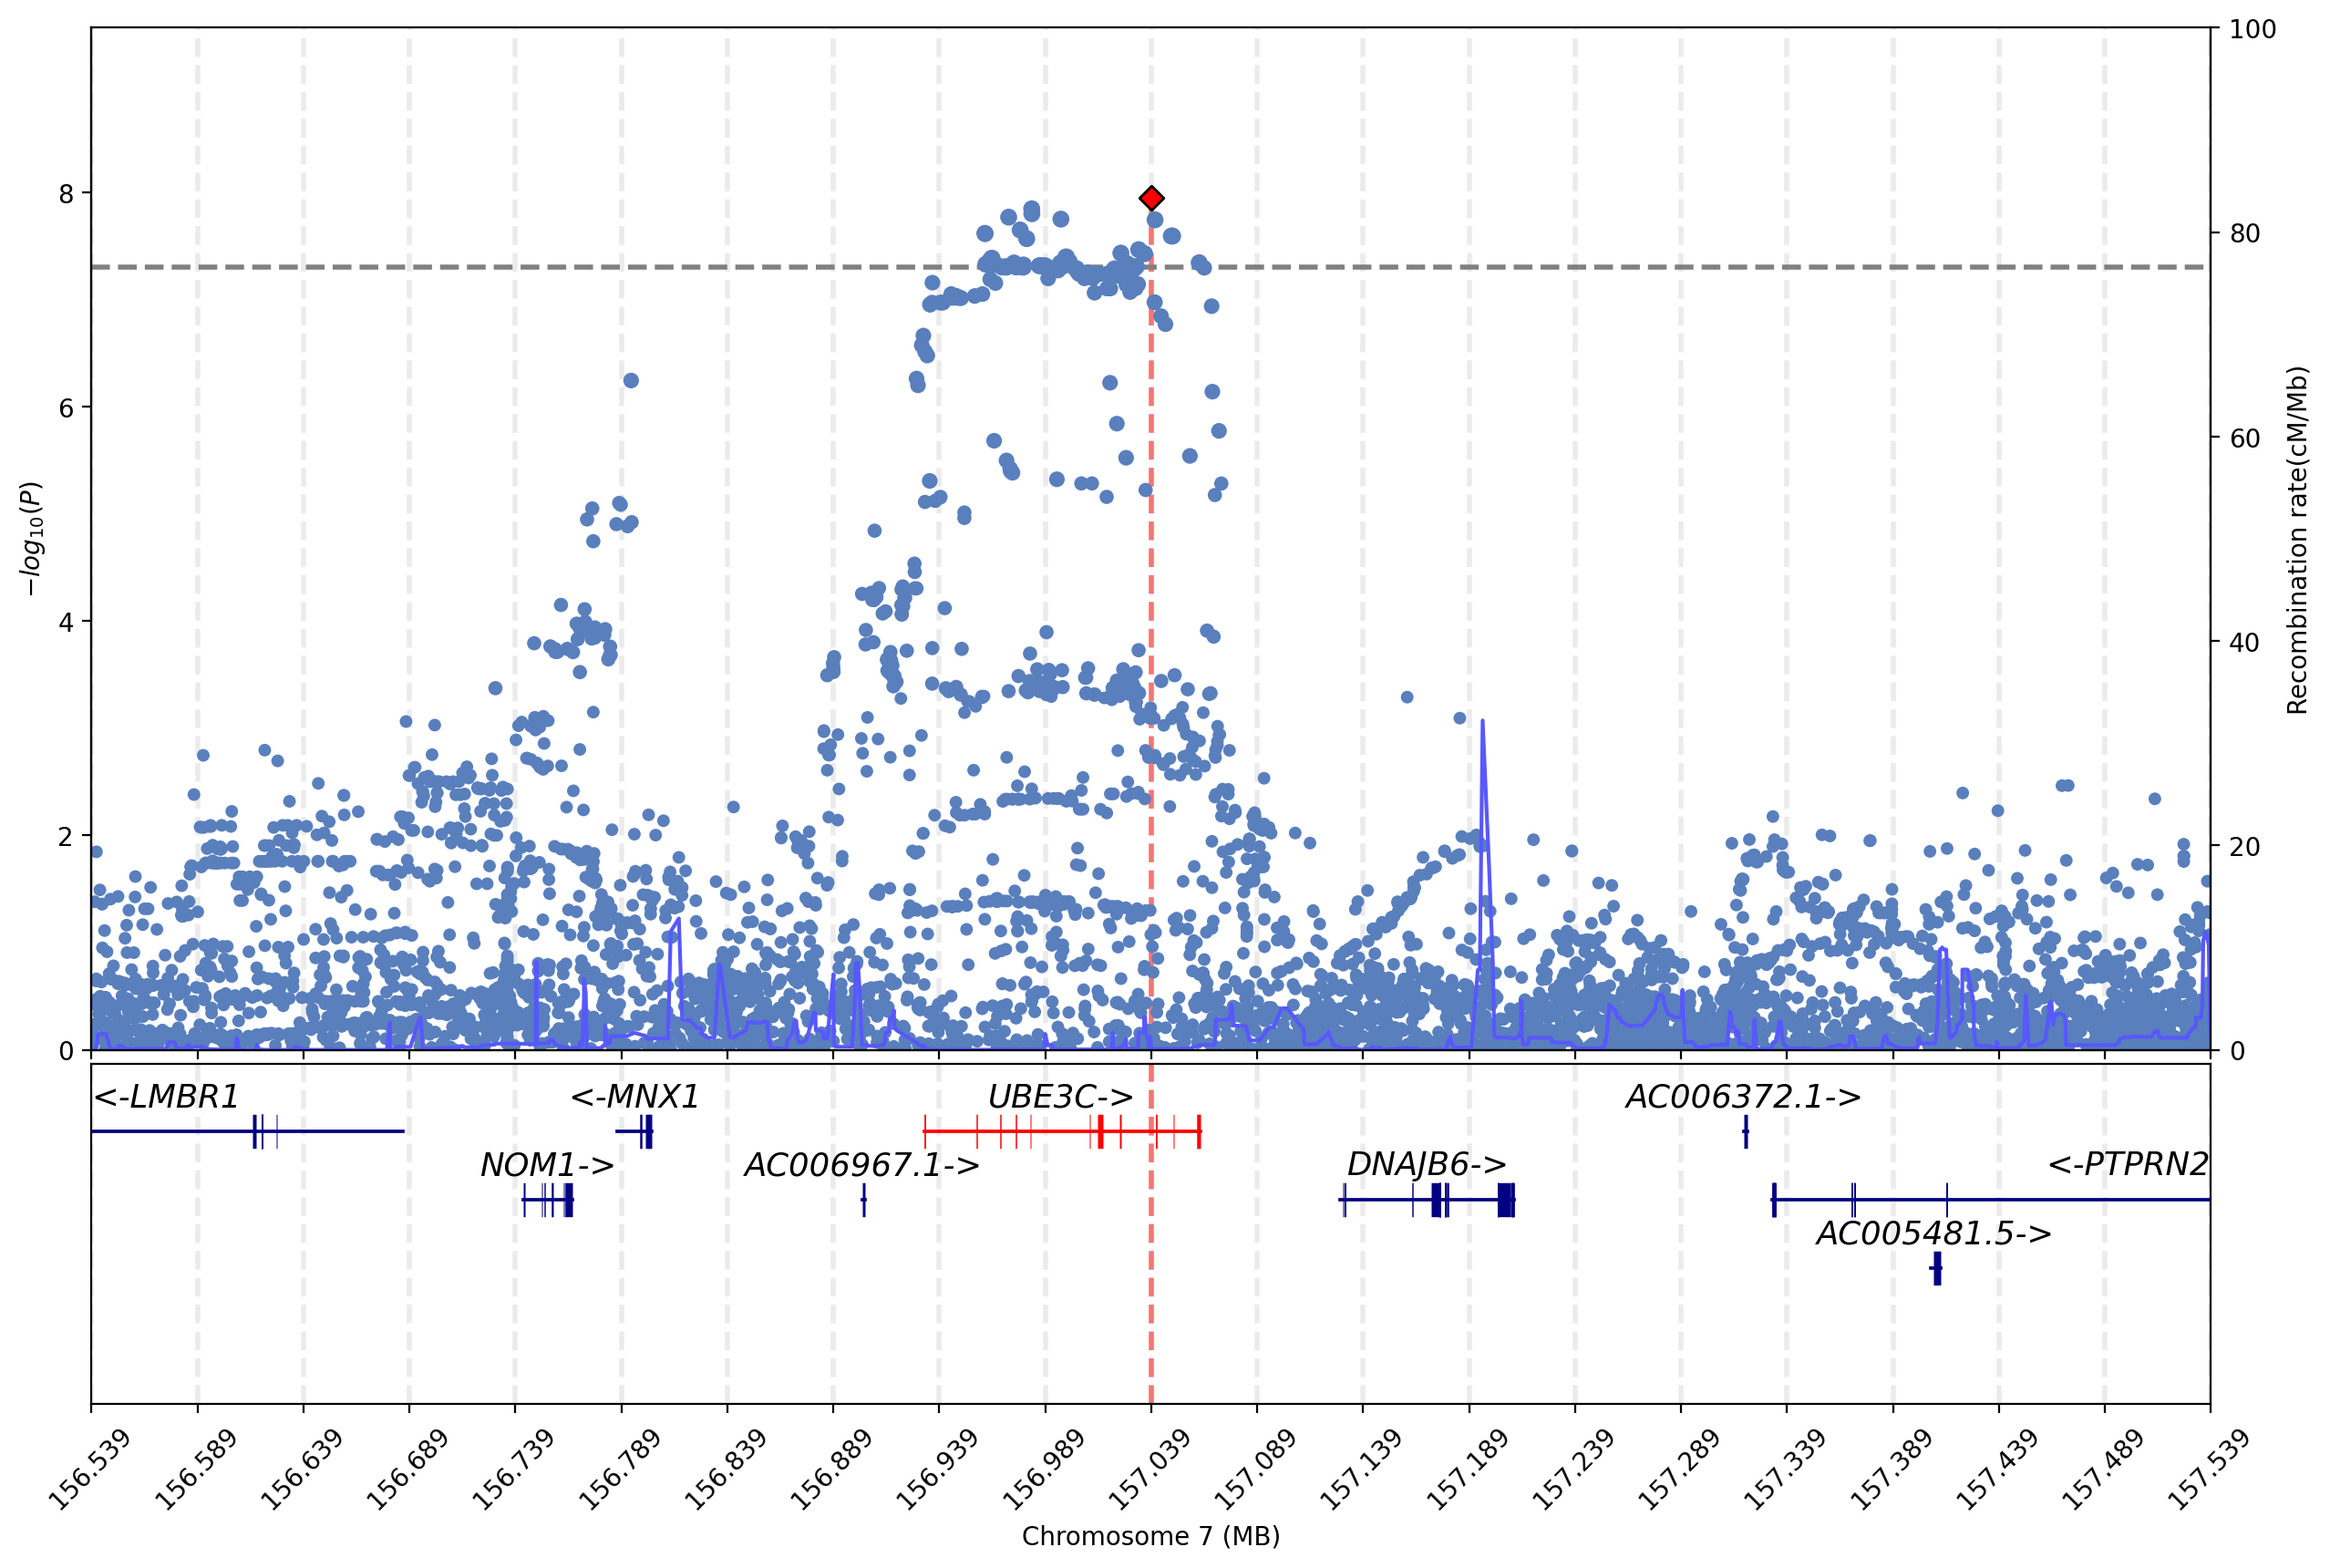

In [9]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True)

## reference download

Full regional plot using a user-provided vcf or preprocessed vcf:
(e.g 1000 genome, see Reference: https://cloufield.github.io/gwaslab/Reference/)

### check available reference

update the available reference list first

In [10]:
gl.update_available_ref()

Sat Nov  5 18:31:31 2022 Updating available_ref list from: https://raw.github.com/Cloufield/gwaslab/main/src/gwaslab/data/reference.json
Sat Nov  5 18:31:32 2022 Available_ref list has been updated!


In [11]:
gl.check_available_ref()

Sat Nov  5 18:31:32 2022 Start to check available reference files...
Sat Nov  5 18:31:32 2022  - 1kg_eas_hg19  :  https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eas_hg19_tbi  :  https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eur_hg19  :  https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eur_hg19_tbi  :  https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eas_hg38  :  https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eas_hg38_tbi  :  https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1
Sat Nov  5 18:31:32 2022  - 1kg_eur_hg38  :  https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_no

{'1kg_eas_hg19': 'https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eas_hg19_tbi': 'https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eur_hg19': 'https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eur_hg19_tbi': 'https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eas_hg38': 'https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eas_hg38_tbi': 'https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 '1kg_eur_hg38': 'https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eur_hg38_tbi': 'https://www.dropbox.com/s/ze8g58x75x9qbf0/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 'dbsnp_v151_hg19': 'https://ftp.ncbi.nih.gov/snp/organisms/human_9606_b151_GRCh37p13/VCF/00-All

### download reference using gwaslab

In [12]:
gl.download_ref("1kg_eas_hg19")

Sat Nov  5 18:31:32 2022 Start to download  1kg_eas_hg19  ...
Sat Nov  5 18:31:32 2022  -Downloading to: /home/yunye/gwaslab/gwaslab/src/gwaslab/data/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Sat Nov  5 18:36:19 2022  -Updating record in config file...
Sat Nov  5 18:36:21 2022  -Updating record in config file...
Sat Nov  5 18:36:21 2022  -Downloading to: /home/yunye/gwaslab/gwaslab/src/gwaslab/data/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
Sat Nov  5 18:36:21 2022 Downloaded  1kg_eas_hg19  successfully!


after downloading, use `get_path` to select the file path

Sat Nov  5 18:36:21 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Nov  5 18:36:21 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Nov  5 18:36:21 2022  -Raw input contains 12557761 variants...
Sat Nov  5 18:36:21 2022  -Plot layout mode is : r
Sat Nov  5 18:36:21 2022  -Region to plot : chr7:156538803-157538803.
Sat Nov  5 18:36:22 2022  -Extract SNPs in region : chr7:156538803-157538803...
Sat Nov  5 18:36:49 2022  -Extract SNPs in specified regions: 5831
Sat Nov  5 18:36:49 2022 Finished loading specified columns from the sumstats.
Sat Nov  5 18:36:49 2022 Start conversion and sanity check:
Sat Nov  5 18:36:49 2022  -Removed 0 variants with nan in CHR or POS column ...
Sat Nov  5 18:36:49 2022  -Removed 0 variants with nan in P column ...
Sat Nov  5 18:36:49 2022  -P values are being converted to -log10(P)...
Sat Nov  5 18:36:49 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Nov  5 18:3

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.Log.Log at 0x7f2377c8bfd0>)

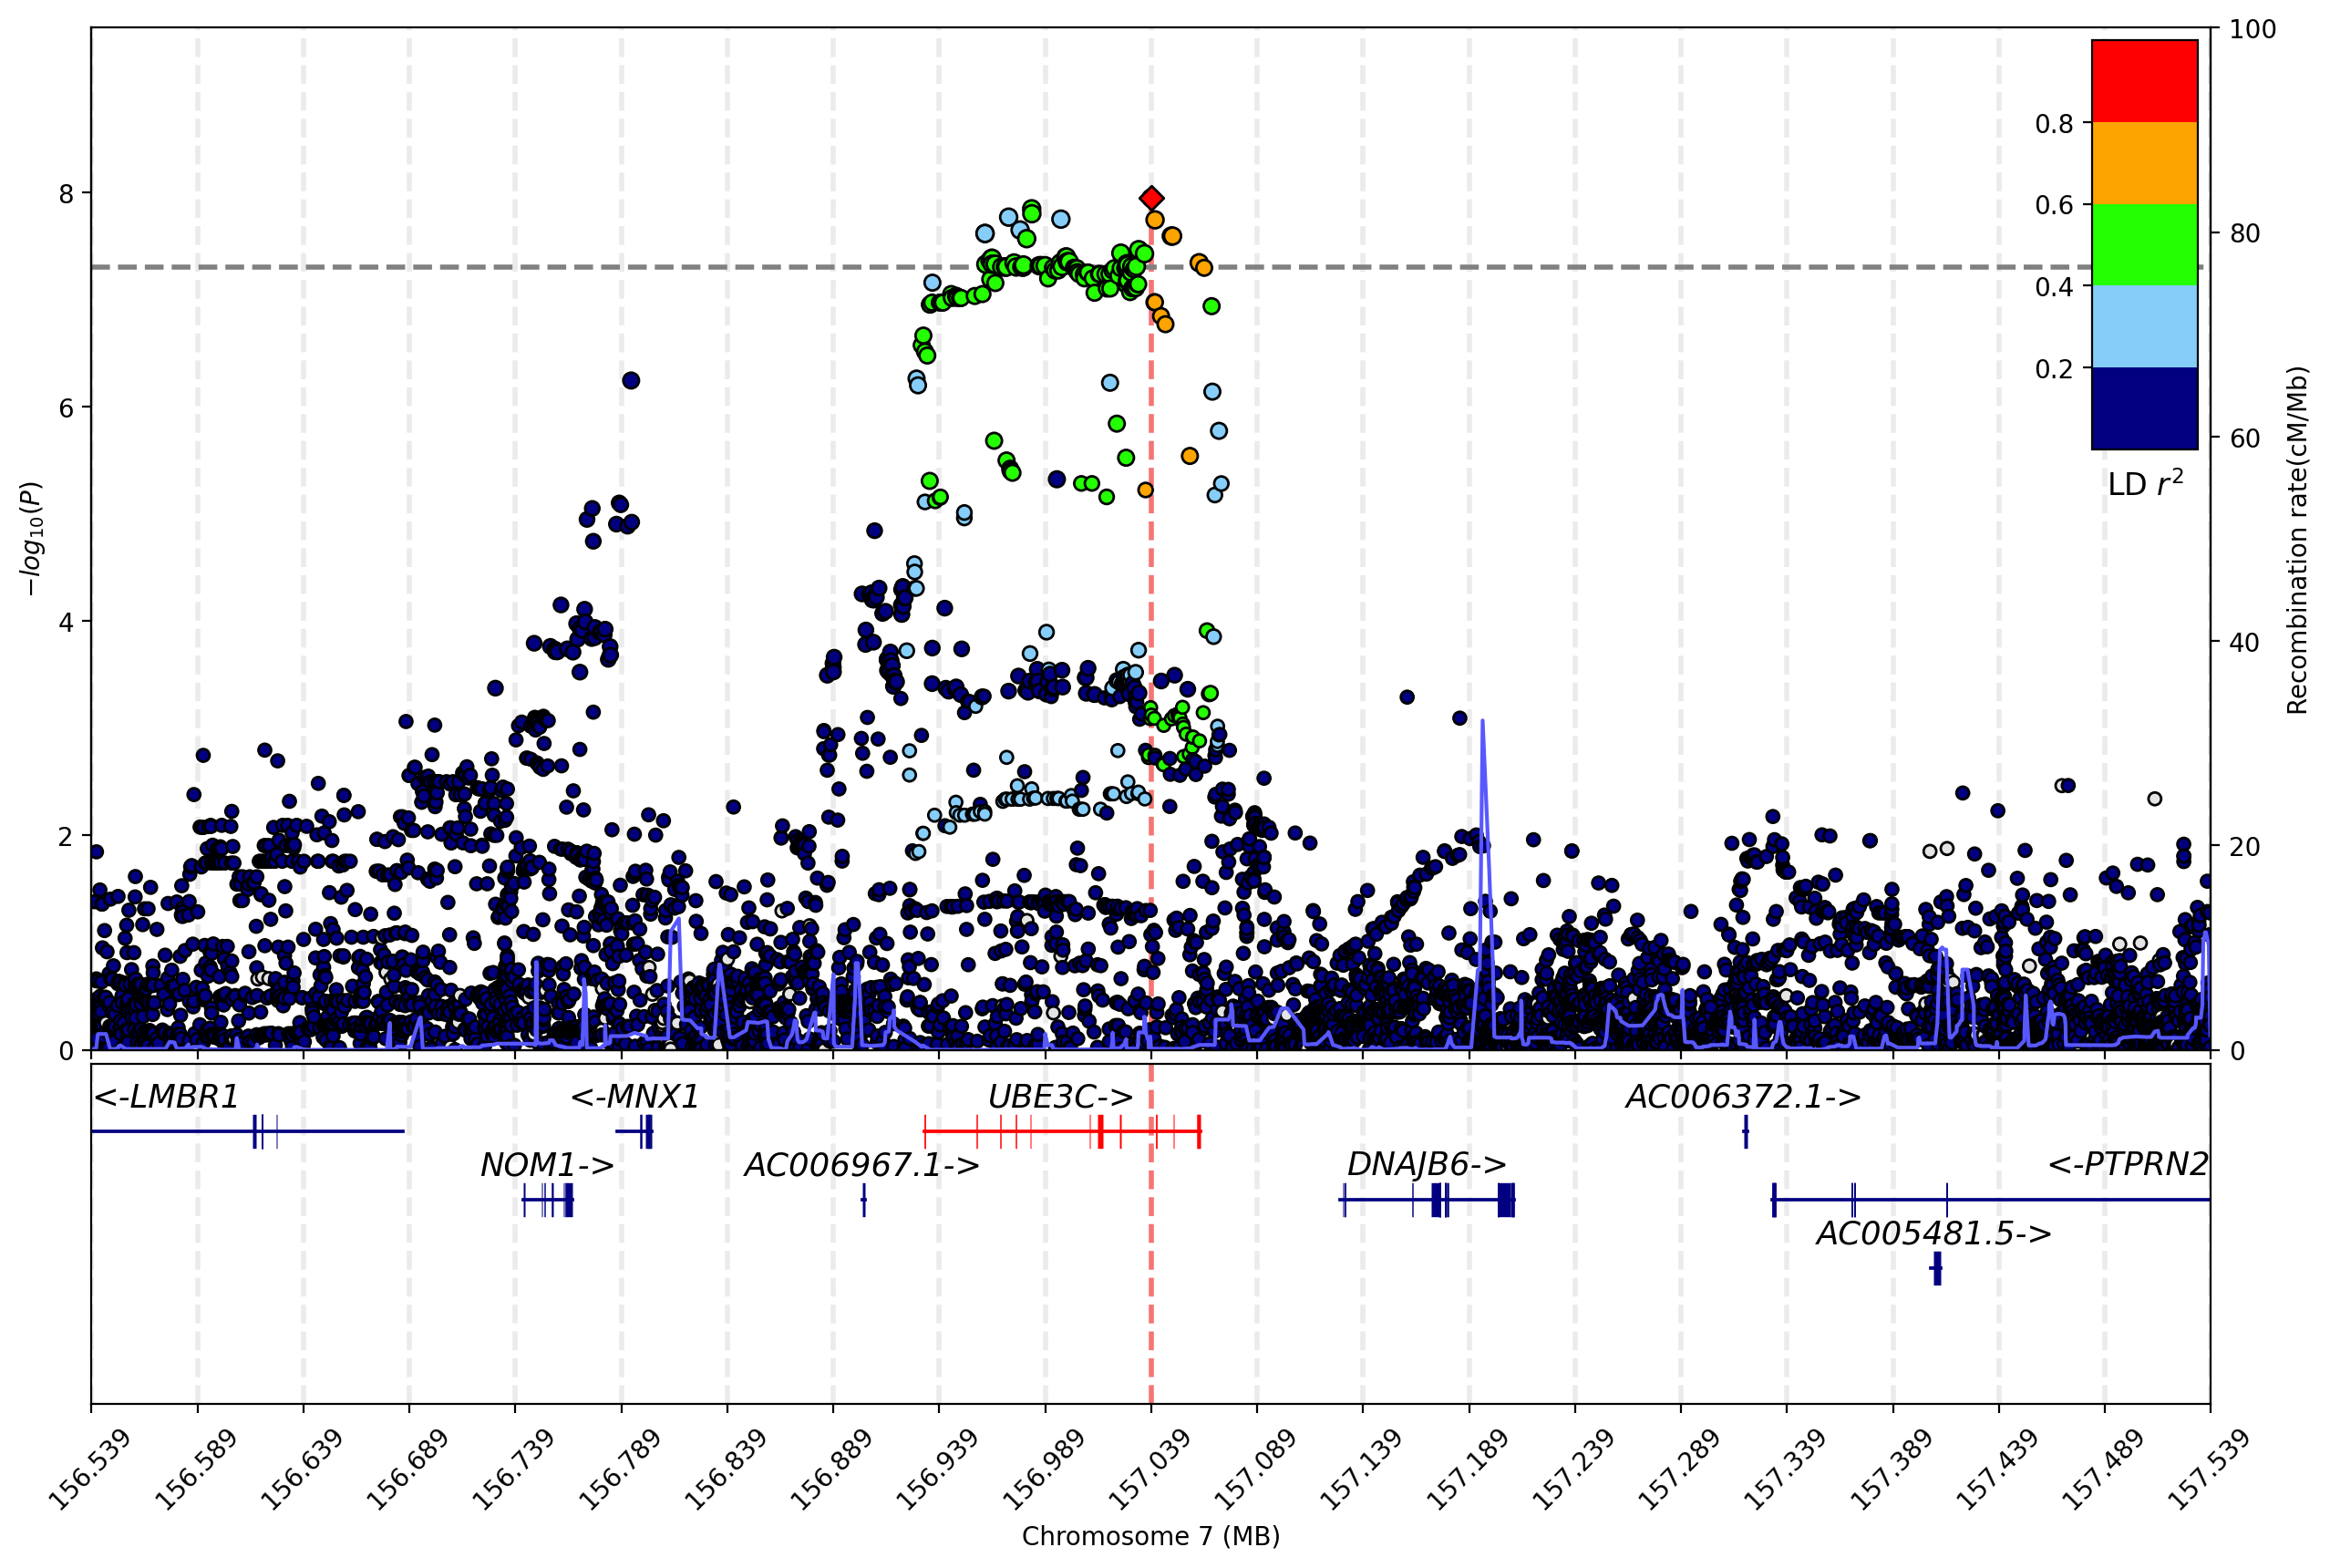

In [13]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True,vcf_path=gl.get_path("1kg_eas_hg19"))

or you can provide your own vcf file. Let's annotate the lead variant this time.

Sat Nov  5 12:53:17 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Nov  5 12:53:17 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Nov  5 12:53:17 2022  -Raw input contains 12557761 variants...
Sat Nov  5 12:53:17 2022  -Plot layout mode is : r
Sat Nov  5 12:53:17 2022  -Region to plot : chr7:156538803-157538803.
Sat Nov  5 12:53:19 2022  -Extract SNPs in region : chr7:156538803-157538803...
Sat Nov  5 12:53:43 2022  -Extract SNPs in specified regions: 5831
Sat Nov  5 12:53:44 2022 Finished loading specified columns from the sumstats.
Sat Nov  5 12:53:44 2022 Start conversion and sanity check:
Sat Nov  5 12:53:44 2022  -Removed 0 variants with nan in CHR or POS column ...
Sat Nov  5 12:53:44 2022  -Removed 0 variants with nan in P column ...
Sat Nov  5 12:53:44 2022  -P values are being converted to -log10(P)...
Sat Nov  5 12:53:44 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Nov  5 12:5

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.Log.Log at 0x7f04648d44f0>)

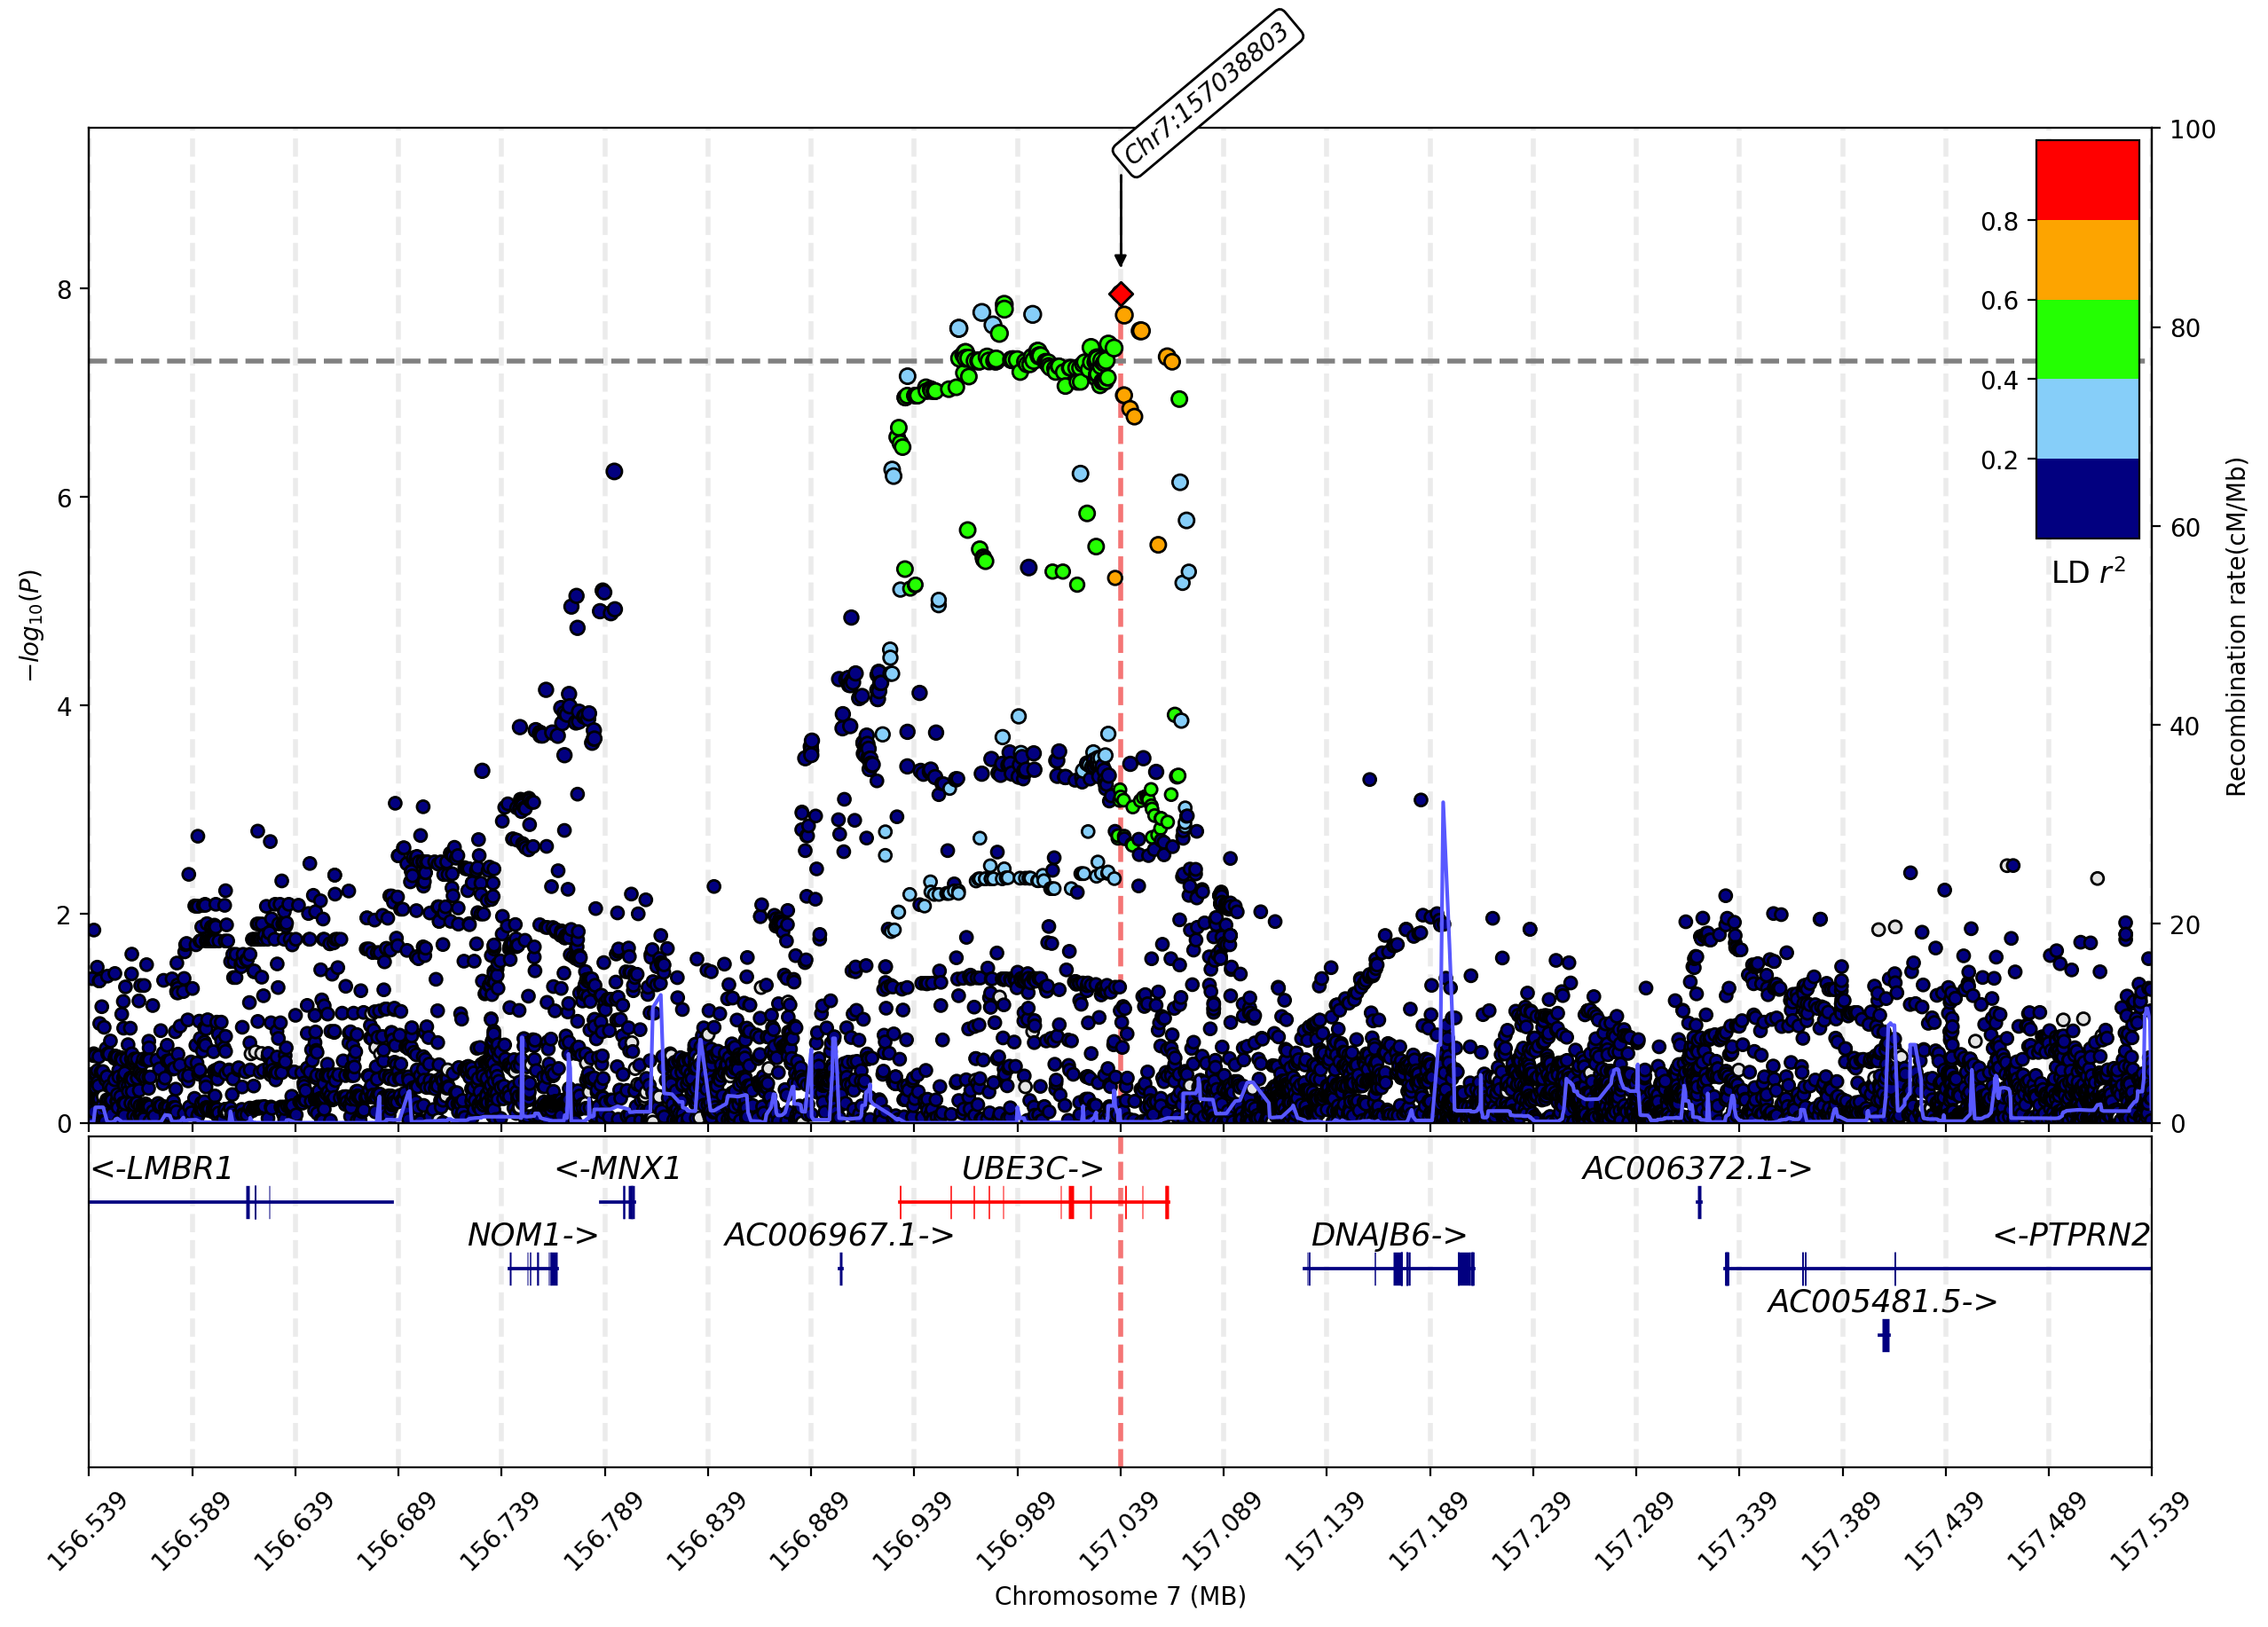

In [13]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True,anno=True,
                    vcf_path="/home/yunye/mydata/d_disk/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz")
                

Note: gwaslab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed. For gene tracks, default is `gtf_path="ensembl"` , you can also use `gtf_path="refseq"` (NCBA RefSeq)

## Sampling

There are more than 10 million variants in the original sumstats and it will take long to process the entrie dataset. Since it might take a while to process the entire datasets, let us just random sample 1 million variants for this tutorial.

In [12]:
mysumstats.random_variants(n=100000,inplace=True)

Wed Nov  2 13:27:52 2022 Start to randomly select variants from the sumstats...
Wed Nov  2 13:27:52 2022  -Number of variants selected from the sumstats: 100000
Wed Nov  2 13:27:55 2022 Finished sampling...


## Infer genome build

In case you don't know the genome build of the sumstats 

For details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [14]:
mysumstats.infer_build()

Wed Nov  2 13:27:55 2022 Start to infer genome build version using hapmap3 SNPs...
Wed Nov  2 13:27:55 2022  -Loading Hapmap3 variants data...
Wed Nov  2 13:27:58 2022  -CHR:POS will be used for matching...
Wed Nov  2 13:28:00 2022  -Matching variants for hg19: num_hg19 =  8550
Wed Nov  2 13:28:00 2022  -Matching variants for hg38: num_hg38 =  134
Wed Nov  2 13:28:00 2022  -Warning: please be cautious due to the limited number of variants.
Wed Nov  2 13:28:00 2022  -Since num_hg19 >> num_hg38, assigning genome build hg19...


## Fix_id

You may notice that the SNPID is in CHR:POS_REF_ALT format. We want SNPID to be in a stadardized format chr:pos:ref:alt, we can use fix_id for this:

For other options of standardization, see: https://cloufield.github.io/gwaslab/Standardization/

In [4]:
#fixsep : fix ID separator
mysumstats.fix_id(fixsep=True)

Sat Nov  5 00:58:54 2022 Start to check IDs...
Sat Nov  5 00:58:54 2022  -Current Dataframe shape : 12557761  x  12
Sat Nov  5 00:58:54 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Sat Nov  5 00:59:06 2022  -Replacing [_-] in SNPID with ":" ...
Sat Nov  5 00:59:17 2022 Finished checking IDs successfully!


In [5]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932:G:A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9969999
1,1:725933:A:G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9969999
2,1:737801:T:C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9969999
3,1:749963:T:TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9969999
4,1:751343:T:A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9969999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837:A:G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9969999
12557757,X:154875192:GTACTC:G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9969999
12557758,X:154879115:A:G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9969999
12557759,X:154880669:T:A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9969999


## Harmonise

gwaslab can harmonize the sumstats based on reference files.

- ref_seq : reference genome fasta file for allele alignment
- ref_rsid_tsv : tsv file for annotation of common used variants
- ref_rsid_vcf : vcf file for annotation of other variants
- ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
- ref_alt_freq : field in INFO of vcf file for alternative allele frequency

For details see: https://cloufield.github.io/gwaslab/Harmonization/

For reference data, see: https://cloufield.github.io/gwaslab/Reference/

In [17]:
mysumstats.harmonize(basic_check=False,
                    n_cores=3,
                    ref_seq="/Users/he/Documents/Mydata/human_g1k_v37.fasta",
                    ref_rsid_tsv="/Users/he/Documents/Mydata/EAS_1kg_af_dbsnp151.ALL.tsv",
                    ref_rsid_vcf="/Users/he/Documents/Mydata/All_20180423.vcf.gz",
                    ref_infer="/Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz",ref_alt_freq="AF")

Wed Nov  2 13:28:01 2022 Start to check if NEA is aligned with reference sequence...
Wed Nov  2 13:28:01 2022  -Current Dataframe shape : 100000  x  12
Wed Nov  2 13:28:01 2022  -Reference genome fasta file: /Users/he/Documents/Mydata/human_g1k_v37.fasta
Wed Nov  2 13:28:01 2022  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Wed Nov  2 13:28:39 2022  -Variants allele on given reference sequence :  41568
Wed Nov  2 13:28:39 2022  -Variants flipped :  50063
Wed Nov  2 13:28:39 2022   -Raw Matching rate :  91.63%
Wed Nov  2 13:28:39 2022  -Variants inferred reverse_complement :  0
Wed Nov  2 13:28:39 2022  -Variants inferred reverse_complement_flipped :  0
Wed Nov  2 13:28:39 2022  -Both allele on genome + unable to distinguish :  8369
Wed Nov  2 13:28:39 2022  -Variants not on given reference sequence :  0
Wed Nov  2 13:28:39 2022  -Current Dataframe shape : 100000  x  12
Wed Nov  2 13:28:40 2022 Start to flip allele-specific

Check the data again. Looks good!

In [18]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:854168:C:T,rs79188446,1,854168,T,C,0.1484,-0.0292,0.0156,0.06173,166718,-?-+,1960010
1,1:856510:C:T,rs191530247,1,856510,T,C,0.0045,0.0604,0.1278,0.63650,166718,+?+-,1960010
2,1:981131:A:G,rs9697293,1,981131,G,A,0.0330,0.0183,0.0273,0.50200,166718,-?+-,1960000
3,1:1021408:G:A,rs11260587,1,1021408,A,G,0.0010,-0.1388,0.2623,0.59680,166718,-?+-,1960010
4,1:1038997:ACTC:A,rs71576598,1,1038997,A,ACTC,0.2037,0.0162,0.0111,0.14410,191764,+++-,1960364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:154429214:A:G,rs4893075,23,154429214,G,A,0.1802,0.0063,0.0096,0.51160,191764,+-+-,1960000
99996,X:154452019:G:A,rs113007852,23,154452019,A,G,0.0143,0.0374,0.0437,0.39210,191764,+-++,1960010
99997,X:154682147:C:A,rs5940511,23,154682147,A,C,0.7852,-0.0081,0.0084,0.33460,191764,-+-+,1960010
99998,X:154740552:T:C,rs5940461,23,154740552,C,T,0.7972,-0.0086,0.0090,0.33840,191764,-+-+,1960000


Check the summary of the currrent sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [19]:
mysumstats.summary()

Values  Percentage
Category Items                                                   
META     Row_num                               100000         NaN
         Column_num                                 6         NaN
         Column_names       SNPID,rsID,EAF,P,N,STATUS         NaN
         Last_checked_time   Wed Nov  2 13:35:42 2022         NaN
MISSING  Missing_total                            618        0.62
         Missing_rsID                             618        0.62
MAF      Common                                 50567       50.57
         Low_frequency                          17297       17.30
         Rare                                   32073       32.07
P        Minimum                            6.973e-74        0.00
         Significant                               73        0.07
         Suggestive                               140        0.14
STATUS   1960010                                42746       42.75
         1960000                                34016       34.02
         1960011                                 6324        6.32
         1960001                                 6196        6.20
         1960364                                 4531        4.53
         1960363                                 3538        3.54
         1960007                                  629        0.63
         1960017                                  622        0.62
         1960309                                  529        0.53
         1960368                                  300        0.30
         1960008                                  189        0.19
         1960319                                  181        0.18
         1960018                                  175        0.18
         1960012                                   15        0.02
         1960002                                    9        0.01

## Formatting and saving : to_format()

You can easily format the processed sumstats and save it.

For details see: https://cloufield.github.io/gwaslab/Format/

In [20]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

Wed Nov  2 13:35:42 2022 Start to format the output sumstats in:  ldsc  format
Wed Nov  2 13:35:42 2022  -Formatting statistics ...
Wed Nov  2 13:35:42 2022  - Float statistics formats:
Wed Nov  2 13:35:42 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Wed Nov  2 13:35:42 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Wed Nov  2 13:35:42 2022  - Start outputting sumstats in ldsc format...
Wed Nov  2 13:35:42 2022  -ldsc format will be loaded...
Wed Nov  2 13:35:42 2022  -ldsc format meta info:
Wed Nov  2 13:35:42 2022   - format_name  :  ldsc
Wed Nov  2 13:35:42 2022   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
Wed Nov  2 13:35:42 2022   - format_source2  :  https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
Wed Nov  2 13:35:42 2022   - format_version  :  20150306
Wed Nov  2 13:35:42 2022  -gwaslab to ldsc format dictionary:
Wed Nov  2 13:35:42 2022   - gwaslab keys: ['rsID', 'NEA', 'EA', 'N', 'BETA', 'P', 'INFO', 'OR

## Liftover

If the sumstats need liftover:

In [21]:
mysumstats.liftover(n_cores=1,from_build="19", to_build="38")

Wed Nov  2 13:49:15 2022 Start to perform liftover...
Wed Nov  2 13:49:15 2022  -Current Dataframe shape : 100000  x  13
Wed Nov  2 13:49:15 2022  -CPU Cores to use : 1
Wed Nov  2 13:49:15 2022  -Performing liftover ...
Wed Nov  2 13:49:15 2022  -Creating converter : hg19 to hg38
Wed Nov  2 13:49:16 2022  -Converting variants with status code xxx0xxx :100000...
Wed Nov  2 13:49:50 2022  -Removed unmapped variants: 53
Wed Nov  2 13:49:52 2022 Finished liftover successfully!


In [22]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:854168:C:T,rs79188446,1,918788,T,C,0.1484,-0.0292,0.0156,0.06173,166718,-?-+,3860099
1,1:856510:C:T,rs191530247,1,921130,T,C,0.0045,0.0604,0.1278,0.63650,166718,+?+-,3860099
2,1:981131:A:G,rs9697293,1,1045751,G,A,0.0330,0.0183,0.0273,0.50200,166718,-?+-,3860099
3,1:1021408:G:A,rs11260587,1,1086028,A,G,0.0010,-0.1388,0.2623,0.59680,166718,-?+-,3860099
4,1:1038997:ACTC:A,rs71576598,1,1103617,A,ACTC,0.2037,0.0162,0.0111,0.14410,191764,+++-,3860399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:154429214:A:G,rs4893075,23,155200937,G,A,0.1802,0.0063,0.0096,0.51160,191764,+-+-,3860099
99996,X:154452019:G:A,rs113007852,23,155223738,A,G,0.0143,0.0374,0.0437,0.39210,191764,+-++,3860099
99997,X:154682147:C:A,rs5940511,23,155452486,A,C,0.7852,-0.0081,0.0084,0.33460,191764,-+-+,3860099
99998,X:154740552:T:C,rs5940461,23,155510891,C,T,0.7972,-0.0086,0.0090,0.33840,191764,-+-+,3860099


Note: Gwaslab only liftover CHR and POS, and when lifted, the last two digits status code will be rolled back to 99. Since for difference reference genome, the reference allele or strand might be reverse, so it is need to align and check agin.



For details, see https://cloufield.github.io/gwaslab/LiftOver/